In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('../data/binary_class_resampled.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167868 entries, 0 to 1167867
Data columns (total 71 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0    Destination Port             1167868 non-null  int64  
 1    Flow Duration                1167868 non-null  int64  
 2    Total Fwd Packets            1167868 non-null  int64  
 3    Total Backward Packets       1167868 non-null  int64  
 4   Total Length of Fwd Packets   1167868 non-null  int64  
 5    Total Length of Bwd Packets  1167868 non-null  int64  
 6    Fwd Packet Length Max        1167868 non-null  int64  
 7    Fwd Packet Length Min        1167868 non-null  int64  
 8    Fwd Packet Length Mean       1167868 non-null  float64
 9    Fwd Packet Length Std        1167868 non-null  float64
 10  Bwd Packet Length Max         1167868 non-null  int64  
 11   Bwd Packet Length Min        1167868 non-null  int64  
 12   Bwd Packet Length Mean     

In [5]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,61756852,16,15,952,7634,627,0,59.500000,161.165753,...,20,240011.1667,463531.5656,1186191,50635,9979568.333,51253.44811,10000000,9874958,0
1,443,3062933,10,12,1144,9484,357,0,114.400000,148.935631,...,20,0.0000,0.0000,0,0,0.000,0.00000,0,0,0
2,53,30641,1,1,65,93,65,65,65.000000,0.000000,...,32,0.0000,0.0000,0,0,0.000,0.00000,0,0,0
3,443,11053685,9,8,2256,4335,837,0,250.666667,350.006786,...,20,174260.0000,0.0000,174260,174260,5379159.000,0.00000,5379159,5379159,0
4,53,268,2,2,94,336,47,47,47.000000,0.000000,...,32,0.0000,0.0000,0,0,0.000,0.00000,0,0,0


In [ ]:
X_train=df.drop(columns=[' Label'])
y_train=df[' Label']
print(X_train.shape)
print(y_train.shape)
test_set=pd.read_csv('../data/binary_test.csv')
X_test=test_set.drop(columns=[' Label'])
y_test=test_set[' Label']
print(X_test.shape)
print(y_test.shape)

(1167868, 70)
(1167868,)
(400396, 70)
(400396,)


In [7]:
from wavkan.KAN import KAN
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [8]:
# all
features=['Flow Bytes/s', ' Fwd Packet Length Min', ' Idle Std', ' Bwd Packets/s', 'FIN Flag Count', ' Active Std', ' Down/Up Ratio', ' Init_Win_bytes_backward', ' Active Min', 'Bwd IAT Total', 'Init_Win_bytes_forward', ' SYN Flag Count', 'Fwd PSH Flags', 'Fwd Packets/s', ' Flow Packets/s', ' URG Flag Count', ' Bwd Packet Length Min', ' PSH Flag Count', ' Flow IAT Min', ' Bwd IAT Std', ' Active Max', ' Min Packet Length', ' Subflow Fwd Bytes', 'Total Length of Fwd Packets', 'Fwd IAT Total', ' Flow Duration', 'Active Mean', ' Destination Port', ' Fwd Packet Length Std', ' Bwd IAT Max', ' Bwd IAT Min', ' ACK Flag Count', ' Idle Min', ' Bwd IAT Mean', ' Flow IAT Mean', ' Packet Length Variance', ' Fwd Packet Length Max', ' Fwd IAT Min', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', 'Idle Mean', ' Fwd IAT Std', ' Fwd URG Flags', ' CWE Flag Count', ' RST Flag Count', ' ECE Flag Count', ' Idle Max', ' Bwd Header Length', ' Flow IAT Max', ' Fwd IAT Max', ' Flow IAT Std', ' Fwd IAT Mean', ' Bwd Packet Length Std', ' Average Packet Size', ' Packet Length Mean', 'Bwd Packet Length Max', ' Packet Length Std', ' Fwd Header Length.1', ' Fwd Header Length', ' Avg Bwd Segment Size', ' Bwd Packet Length Mean', ' Max Packet Length', ' min_seg_size_forward', ' Total Length of Bwd Packets', ' Subflow Bwd Bytes', ' Subflow Bwd Packets', ' Total Backward Packets', ' Total Fwd Packets', 'Subflow Fwd Packets', ' act_data_pkt_fwd']
# rf
# features=[' Bwd Packet Length Std', ' Bwd Packet Length Mean', ' Packet Length Variance', ' Average Packet Size', ' Max Packet Length', ' Avg Bwd Segment Size', ' Total Length of Bwd Packets', ' Packet Length Mean', ' Packet Length Std', 'Bwd Packet Length Max', ' Destination Port', 'Subflow Fwd Packets', ' Subflow Bwd Bytes', ' Total Fwd Packets', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' min_seg_size_forward', ' PSH Flag Count', ' Fwd Packet Length Max', ' act_data_pkt_fwd', ' ACK Flag Count', ' Bwd Header Length', ' Flow IAT Std', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', ' Fwd Header Length.1', ' Flow IAT Max', ' Total Backward Packets', ' Bwd Packets/s', ' Init_Win_bytes_backward', 'Fwd IAT Total', ' Fwd IAT Min', 'Init_Win_bytes_forward', ' Flow IAT Mean', ' Fwd Header Length', ' Subflow Bwd Packets', ' Idle Min', ' Fwd IAT Std', 'Flow Bytes/s', ' Flow Packets/s']
# pca
# features=['Flow Bytes/s', ' Fwd Packet Length Min', ' Idle Std', ' Bwd Packets/s', 'FIN Flag Count', ' Active Std', ' Down/Up Ratio', ' Init_Win_bytes_backward', ' Active Min', 'Bwd IAT Total', 'Init_Win_bytes_forward', ' SYN Flag Count', 'Fwd PSH Flags', 'Fwd Packets/s', ' Flow Packets/s', ' URG Flag Count', ' Bwd Packet Length Min', ' PSH Flag Count', ' Flow IAT Min', ' Bwd IAT Std', ' Active Max', ' Min Packet Length', ' Subflow Fwd Bytes', 'Total Length of Fwd Packets', 'Fwd IAT Total', ' Flow Duration', 'Active Mean', ' Destination Port', ' Fwd Packet Length Std', ' Bwd IAT Max', ' Bwd IAT Min', ' ACK Flag Count', ' Idle Min', ' Bwd IAT Mean', ' Flow IAT Mean', ' Packet Length Variance', ' Fwd Packet Length Max', ' Fwd IAT Min', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', 'Idle Mean', ' Fwd IAT Std', ' Fwd URG Flags', ' CWE Flag Count', ' RST Flag Count', ' ECE Flag Count', ' Idle Max', ' Bwd Header Length', ' Flow IAT Max', ' Fwd IAT Max', ' Flow IAT Std', ' Fwd IAT Mean', ' Bwd Packet Length Std', ' Average Packet Size', ' Packet Length Mean', 'Bwd Packet Length Max', ' Packet Length Std', ' Fwd Header Length.1', ' Fwd Header Length', ' Avg Bwd Segment Size', ' Bwd Packet Length Mean', ' Max Packet Length', ' min_seg_size_forward', ' Total Length of Bwd Packets', ' Subflow Bwd Bytes', ' Subflow Bwd Packets', ' Total Backward Packets', ' Total Fwd Packets', 'Subflow Fwd Packets', ' act_data_pkt_fwd'][:30]
# dt
# features=[' Bwd Packet Length Std', ' Average Packet Size', ' Max Packet Length', ' Destination Port', ' Total Length of Bwd Packets', ' Init_Win_bytes_backward', ' Bwd Packets/s', ' Bwd IAT Std', ' Subflow Bwd Bytes', ' Bwd IAT Min', 'Subflow Fwd Packets', ' Fwd Packet Length Std', ' Fwd Packet Length Max', ' Fwd IAT Std', ' Fwd IAT Mean', ' Flow IAT Min', ' Total Fwd Packets', ' Flow Duration', 'Total Length of Fwd Packets', ' Total Backward Packets']
# scaler1=MinMaxScaler(feature_range=(-1, 1))
# X_train=scaler1.fit_transform(X_train[features])
# scaler2=MinMaxScaler(feature_range=(-1, 1))
# X_test=scaler2.fit_transform(X_test[features])
# scaler1=MinMaxScaler(feature_range=(-1, 1))
# X_train=scaler1.fit_transform(X_train)
# scaler2=MinMaxScaler(feature_range=(-1, 1))
# X_test=scaler2.fit_transform(X_test)
X_train=X_train[features].to_numpy()
X_test=X_test[features].to_numpy()


In [9]:
# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

In [10]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 512  # Adjust based on your memory constraints
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [11]:
# Defining wavelet types to try
wavelet_types = ['shannon', 'morlet', 'dog']
# wavelet_types = ['shannon']

# Training parameters
trials = 1  # Reduced from 5 due to larger dataset
epochs_per_trial = 50  # Reduced from 50 due to larger dataset

In [12]:
# Metrics for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix, classification_report

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("colorblind")
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['figure.figsize'] = [14, 10]

In [13]:
results = {}

# Looping over each wavelet type
for wavelet in wavelet_types:
    all_metrics = {
        'train_loss': [], 'train_acc': [], 'train_precision': [], 
        'train_recall': [], 'train_f1': [], 'train_auc': [],
        'val_loss': [], 'val_acc': [], 'val_precision': [], 
        'val_recall': [], 'val_f1': [], 'val_auc': []
    }
    
    print(f'Testing wavelet: {wavelet}')
    
    for trial in range(trials):
        print(f'Trial {trial+1}/{trials}')
        best_val_loss = float('inf')
        patience = 3
        patience_counter = 0
        best_model_state = None
        
        # Define model for binary classification
        model = KAN([len(features), 256, 64, 1], wavelet_type=wavelet, dropout_rate=0.2)
        
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model.to(device)
        if torch.cuda.device_count() > 1:
            print(f"Using {torch.cuda.device_count()} GPUs!")
            model = nn.DataParallel(model)
        
        optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-3)
        scheduler = optim.lr_scheduler.CosineAnnealingLR(
            optimizer, 
            T_max=epochs_per_trial, 
            eta_min=1e-6
        )
        criterion = nn.BCEWithLogitsLoss()
        
        trial_metrics = {key: [] for key in all_metrics.keys()}
        
        for epoch in range(epochs_per_trial):
            # Training
            model.train()
            train_loss = 0.0
            train_preds, train_targets = [], []
            
            for X_batch, y_batch in tqdm(trainloader, desc=f'Epoch {epoch+1}/{epochs_per_trial}', leave=False):
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                
                optimizer.zero_grad()
                outputs = model(X_batch).squeeze()
                loss = criterion(outputs, y_batch)
                loss.backward()
                optimizer.step()
                
                train_loss += loss.item()
                
                # Store predictions and targets for metrics
                probs = torch.sigmoid(outputs).detach().cpu().numpy()
                preds = (probs > 0.5).astype(int)
                train_preds.extend(preds)
                train_targets.extend(y_batch.cpu().numpy())
            
            # Calculate training metrics
            train_loss /= len(trainloader)
            train_acc = accuracy_score(train_targets, train_preds)
            train_precision = precision_score(train_targets, train_preds, zero_division=0)
            train_recall = recall_score(train_targets, train_preds, zero_division=0)
            train_f1 = f1_score(train_targets, train_preds, zero_division=0)
            train_auc = roc_auc_score(train_targets, train_preds)
            
            trial_metrics['train_loss'].append(train_loss)
            trial_metrics['train_acc'].append(train_acc)
            trial_metrics['train_precision'].append(train_precision)
            trial_metrics['train_recall'].append(train_recall)
            trial_metrics['train_f1'].append(train_f1)
            trial_metrics['train_auc'].append(train_auc)
            
            # Validation
            model.eval()
            val_loss = 0.0
            val_preds, val_targets = [], []
            
            with torch.no_grad():
                for X_batch, y_batch in testloader:
                    X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                    
                    outputs = model(X_batch).squeeze()
                    loss = criterion(outputs, y_batch)
                    val_loss += loss.item()
                    
                    # Store predictions and targets for metrics
                    probs = torch.sigmoid(outputs).cpu().numpy()
                    preds = (probs > 0.5).astype(int)
                    val_preds.extend(preds)
                    val_targets.extend(y_batch.cpu().numpy())
            
            # Calculate validation metrics
            val_loss /= len(testloader)
            val_acc = accuracy_score(val_targets, val_preds)
            val_precision = precision_score(val_targets, val_preds, zero_division=0)
            val_recall = recall_score(val_targets, val_preds, zero_division=0)
            val_f1 = f1_score(val_targets, val_preds, zero_division=0)
            val_auc = roc_auc_score(val_targets, val_preds)
            
            trial_metrics['val_loss'].append(val_loss)
            trial_metrics['val_acc'].append(val_acc)
            trial_metrics['val_precision'].append(val_precision)
            trial_metrics['val_recall'].append(val_recall)
            trial_metrics['val_f1'].append(val_f1)
            trial_metrics['val_auc'].append(val_auc)
            
            # Update learning rate
            scheduler.step()  # Remove val_loss parameter as it's not needed for CosineAnnealingLR

            # Early stopping check
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f"Early stopping at epoch {epoch+1}")
                    break
            
            # Print progress
            print(f"Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, F1: {train_f1:.4f} | Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, F1: {val_f1:.4f}")
            torch.cuda.empty_cache()
        
        # Ensure all trials have metrics for the same number of epochs
        # by padding with the last values if early stopping occurred
        actual_epochs = len(trial_metrics['train_loss'])
        if actual_epochs < epochs_per_trial:
            for key in trial_metrics:
                # Pad with the last value
                last_value = trial_metrics[key][-1]
                pad_length = epochs_per_trial - actual_epochs
                trial_metrics[key].extend([last_value] * pad_length)
                
        # Add trial metrics to overall results
        for key in all_metrics:
            all_metrics[key].append(trial_metrics[key])
    
    # Average metrics across trials
    avg_metrics = {}
    for key in all_metrics:
        # Average across trials first, then keep the epoch-by-epoch data
        avg_metrics[key] = np.mean(all_metrics[key], axis=0)
    
    # Save results for this wavelet
    results[wavelet] = avg_metrics
    
    # Create and save DataFrame
    results_df = pd.DataFrame({
        'Epoch': range(1, len(avg_metrics['train_loss']) + 1),
        'Train Loss': avg_metrics['train_loss'],
        'Train Accuracy': avg_metrics['train_acc'],
        'Train Precision': avg_metrics['train_precision'],
        'Train Recall': avg_metrics['train_recall'],
        'Train F1': avg_metrics['train_f1'],
        'Train AUC': avg_metrics['train_auc'],
        'Validation Loss': avg_metrics['val_loss'],
        'Validation Accuracy': avg_metrics['val_acc'],
        'Validation Precision': avg_metrics['val_precision'],
        'Validation Recall': avg_metrics['val_recall'],
        'Validation F1': avg_metrics['val_f1'],
        'Validation AUC': avg_metrics['val_auc']
    })
    
    # # Save to Excel
    # file_name = f'{wavelet}_binary_results.xlsx'
    # results_df.to_excel(file_name, index=False)
    # print(f"Results saved to {file_name}")

Testing wavelet: shannon
Trial 1/1
Using 2 GPUs!


Epoch 1/50:  12%|█▏        | 276/2281 [00:07<01:01, 32.86it/s]

Epoch 1: Train Loss: 0.3637, Acc: 0.9398, F1: 0.9067 | Val Loss: 0.3152, Acc: 0.9836, F1: 0.9534


Epoch 2: Train Loss: 0.2654, Acc: 0.9787, F1: 0.9657 | Val Loss: 0.2346, Acc: 0.9881, F1: 0.9662


Epoch 3: Train Loss: 0.2094, Acc: 0.9838, F1: 0.9739 | Val Loss: 0.1794, Acc: 0.9900, F1: 0.9717


Epoch 4: Train Loss: 0.1695, Acc: 0.9858, F1: 0.9771 | Val Loss: 0.1383, Acc: 0.9909, F1: 0.9742


Epoch 5: Train Loss: 0.1393, Acc: 0.9872, F1: 0.9795 | Val Loss: 0.1074, Acc: 0.9915, F1: 0.9759


Epoch 6: Train Loss: 0.1160, Acc: 0.9883, F1: 0.9812 | Val Loss: 0.0909, Acc: 0.9921, F1: 0.9776


Epoch 7: Train Loss: 0.0983, Acc: 0.9892, F1: 0.9826 | Val Loss: 0.0745, Acc: 0.9926, F1: 0.9790


Epoch 8: Train Loss: 0.0842, Acc: 0.9901, F1: 0.9841 | Val Loss: 0.0625, Acc: 0.9932, F1: 0.9808


Epoch 9: Train Loss: 0.0730, Acc: 0.9907, F1: 0.9851 | Val Loss: 0.0533, Acc: 0.9934, F1: 0.9815


Epoch 10: Train Loss: 0.0639, Acc: 0.9912, F1: 0.9858 | Val Loss: 0.0466, Acc: 0.9935, F1: 0.9816


Epoch 11: Train Loss: 0.0565, Acc: 0.9916, F1: 0.9865 | Val Loss: 0.0431, Acc: 0.9934, F1: 0.9815


Epoch 12: Train Loss: 0.0504, Acc: 0.9919, F1: 0.9870 | Val Loss: 0.0391, Acc: 0.9937, F1: 0.9822


Epoch 13: Train Loss: 0.0455, Acc: 0.9921, F1: 0.9874 | Val Loss: 0.0346, Acc: 0.9942, F1: 0.9837


Epoch 14: Train Loss: 0.0413, Acc: 0.9925, F1: 0.9879 | Val Loss: 0.0322, Acc: 0.9941, F1: 0.9834


Epoch 15: Train Loss: 0.0380, Acc: 0.9927, F1: 0.9882 | Val Loss: 0.0294, Acc: 0.9946, F1: 0.9849


Epoch 16: Train Loss: 0.0352, Acc: 0.9927, F1: 0.9883 | Val Loss: 0.0281, Acc: 0.9946, F1: 0.9848


Epoch 17: Train Loss: 0.0329, Acc: 0.9930, F1: 0.9887 | Val Loss: 0.0264, Acc: 0.9948, F1: 0.9855


Epoch 18: Train Loss: 0.0310, Acc: 0.9930, F1: 0.9889 | Val Loss: 0.0272, Acc: 0.9943, F1: 0.9840


Epoch 19: Train Loss: 0.0294, Acc: 0.9931, F1: 0.9890 | Val Loss: 0.0251, Acc: 0.9946, F1: 0.9848


Epoch 20: Train Loss: 0.0279, Acc: 0.9933, F1: 0.9892 | Val Loss: 0.0271, Acc: 0.9940, F1: 0.9832


Epoch 21: Train Loss: 0.0268, Acc: 0.9933, F1: 0.9892 | Val Loss: 0.0240, Acc: 0.9947, F1: 0.9850


Epoch 22: Train Loss: 0.0260, Acc: 0.9934, F1: 0.9895 | Val Loss: 0.0230, Acc: 0.9949, F1: 0.9856


Epoch 23: Train Loss: 0.0250, Acc: 0.9935, F1: 0.9895 | Val Loss: 0.0229, Acc: 0.9950, F1: 0.9858


Epoch 24: Train Loss: 0.0243, Acc: 0.9935, F1: 0.9896 | Val Loss: 0.0219, Acc: 0.9948, F1: 0.9855


Epoch 25: Train Loss: 0.0236, Acc: 0.9936, F1: 0.9897 | Val Loss: 0.0211, Acc: 0.9949, F1: 0.9857


Epoch 26: Train Loss: 0.0232, Acc: 0.9936, F1: 0.9897 | Val Loss: 0.0222, Acc: 0.9948, F1: 0.9855


Epoch 27: Train Loss: 0.0227, Acc: 0.9937, F1: 0.9899 | Val Loss: 0.0222, Acc: 0.9948, F1: 0.9853


Early stopping at epoch 28
Testing wavelet: morlet
Trial 1/1
Using 2 GPUs!


Epoch 1: Train Loss: 0.7658, Acc: 0.5190, F1: 0.3702 | Val Loss: 0.6945, Acc: 0.5964, F1: 0.0924


Epoch 2: Train Loss: 0.6921, Acc: 0.5753, F1: 0.3319 | Val Loss: 0.5212, Acc: 0.8117, F1: 0.3600


Epoch 3: Train Loss: 0.4978, Acc: 0.8039, F1: 0.6419 | Val Loss: 0.3617, Acc: 0.9464, F1: 0.8285


Epoch 4: Train Loss: 0.3913, Acc: 0.8790, F1: 0.7720 | Val Loss: 0.3359, Acc: 0.9509, F1: 0.8449


Epoch 5: Train Loss: 0.3289, Acc: 0.9107, F1: 0.8401 | Val Loss: 0.2695, Acc: 0.9588, F1: 0.8725


Epoch 6: Train Loss: 0.2881, Acc: 0.9301, F1: 0.8789 | Val Loss: 0.2431, Acc: 0.9776, F1: 0.9361


Epoch 7: Train Loss: 0.2589, Acc: 0.9362, F1: 0.8906 | Val Loss: 0.2076, Acc: 0.9760, F1: 0.9312


Epoch 8: Train Loss: 0.2321, Acc: 0.9410, F1: 0.8997 | Val Loss: 0.1778, Acc: 0.9601, F1: 0.8780


Epoch 9: Train Loss: 0.2095, Acc: 0.9453, F1: 0.9077 | Val Loss: 0.1479, Acc: 0.9670, F1: 0.9011


Epoch 10: Train Loss: 0.1868, Acc: 0.9538, F1: 0.9234 | Val Loss: 0.1434, Acc: 0.9784, F1: 0.9381


Epoch 11: Train Loss: 0.1696, Acc: 0.9588, F1: 0.9323 | Val Loss: 0.1366, Acc: 0.9678, F1: 0.9032


Epoch 12: Train Loss: 0.1557, Acc: 0.9624, F1: 0.9386 | Val Loss: 0.1169, Acc: 0.9784, F1: 0.9382


Epoch 13: Train Loss: 0.1432, Acc: 0.9655, F1: 0.9440 | Val Loss: 0.1162, Acc: 0.9717, F1: 0.9164


Epoch 14: Train Loss: 0.1338, Acc: 0.9672, F1: 0.9469 | Val Loss: 0.1095, Acc: 0.9786, F1: 0.9392


Epoch 15: Train Loss: 0.1264, Acc: 0.9682, F1: 0.9487 | Val Loss: 0.1407, Acc: 0.9521, F1: 0.8633


Epoch 16: Train Loss: 0.1206, Acc: 0.9692, F1: 0.9503 | Val Loss: 0.0944, Acc: 0.9810, F1: 0.9459


Epoch 17: Train Loss: 0.1155, Acc: 0.9698, F1: 0.9514 | Val Loss: 0.1048, Acc: 0.9791, F1: 0.9405


Epoch 18: Train Loss: 0.1108, Acc: 0.9709, F1: 0.9531 | Val Loss: 0.1070, Acc: 0.9670, F1: 0.9037


Early stopping at epoch 19
Testing wavelet: dog
Trial 1/1
Using 2 GPUs!


Epoch 1: Train Loss: 0.3514, Acc: 0.9514, F1: 0.9249 | Val Loss: 0.2314, Acc: 0.9789, F1: 0.9422


Epoch 2: Train Loss: 0.2662, Acc: 0.9750, F1: 0.9603 | Val Loss: 0.1725, Acc: 0.9825, F1: 0.9518


Epoch 3: Train Loss: 0.2142, Acc: 0.9779, F1: 0.9646 | Val Loss: 0.1337, Acc: 0.9854, F1: 0.9596


Epoch 4: Train Loss: 0.1756, Acc: 0.9793, F1: 0.9669 | Val Loss: 0.1070, Acc: 0.9862, F1: 0.9618


Epoch 5: Train Loss: 0.1455, Acc: 0.9812, F1: 0.9699 | Val Loss: 0.0851, Acc: 0.9871, F1: 0.9641


Epoch 6: Train Loss: 0.1230, Acc: 0.9826, F1: 0.9722 | Val Loss: 0.0716, Acc: 0.9883, F1: 0.9675


Epoch 7: Train Loss: 0.1062, Acc: 0.9833, F1: 0.9732 | Val Loss: 0.0603, Acc: 0.9892, F1: 0.9700


Epoch 8: Train Loss: 0.0931, Acc: 0.9840, F1: 0.9743 | Val Loss: 0.0546, Acc: 0.9887, F1: 0.9683


Epoch 9: Train Loss: 0.0830, Acc: 0.9844, F1: 0.9750 | Val Loss: 0.0507, Acc: 0.9896, F1: 0.9711


Epoch 10: Train Loss: 0.0750, Acc: 0.9848, F1: 0.9756 | Val Loss: 0.0468, Acc: 0.9895, F1: 0.9707


Epoch 11: Train Loss: 0.0685, Acc: 0.9852, F1: 0.9763 | Val Loss: 0.0454, Acc: 0.9895, F1: 0.9707


Epoch 12: Train Loss: 0.0633, Acc: 0.9855, F1: 0.9767 | Val Loss: 0.0423, Acc: 0.9898, F1: 0.9717


Epoch 13: Train Loss: 0.0590, Acc: 0.9857, F1: 0.9771 | Val Loss: 0.0410, Acc: 0.9902, F1: 0.9728


Epoch 14: Train Loss: 0.0557, Acc: 0.9859, F1: 0.9775 | Val Loss: 0.0409, Acc: 0.9901, F1: 0.9724


Epoch 15: Train Loss: 0.0531, Acc: 0.9860, F1: 0.9777 | Val Loss: 0.0394, Acc: 0.9902, F1: 0.9727


Epoch 16: Train Loss: 0.0509, Acc: 0.9861, F1: 0.9778 | Val Loss: 0.0395, Acc: 0.9901, F1: 0.9725


Epoch 17: Train Loss: 0.0490, Acc: 0.9862, F1: 0.9780 | Val Loss: 0.0391, Acc: 0.9903, F1: 0.9730


Epoch 18: Train Loss: 0.0474, Acc: 0.9865, F1: 0.9784 | Val Loss: 0.0395, Acc: 0.9900, F1: 0.9721


Epoch 19: Train Loss: 0.0463, Acc: 0.9864, F1: 0.9783 | Val Loss: 0.0386, Acc: 0.9904, F1: 0.9733


Epoch 20: Train Loss: 0.0452, Acc: 0.9866, F1: 0.9786 | Val Loss: 0.0377, Acc: 0.9905, F1: 0.9736


Epoch 21: Train Loss: 0.0443, Acc: 0.9866, F1: 0.9786 | Val Loss: 0.0389, Acc: 0.9906, F1: 0.9737


Epoch 22: Train Loss: 0.0437, Acc: 0.9867, F1: 0.9787 | Val Loss: 0.0387, Acc: 0.9906, F1: 0.9739


Epoch 23: Train Loss: 0.0430, Acc: 0.9868, F1: 0.9789 | Val Loss: 0.0374, Acc: 0.9907, F1: 0.9740


Epoch 24: Train Loss: 0.0424, Acc: 0.9868, F1: 0.9790 | Val Loss: 0.0385, Acc: 0.9907, F1: 0.9740


Epoch 25: Train Loss: 0.0420, Acc: 0.9869, F1: 0.9791 | Val Loss: 0.0380, Acc: 0.9907, F1: 0.9740


Early stopping at epoch 26


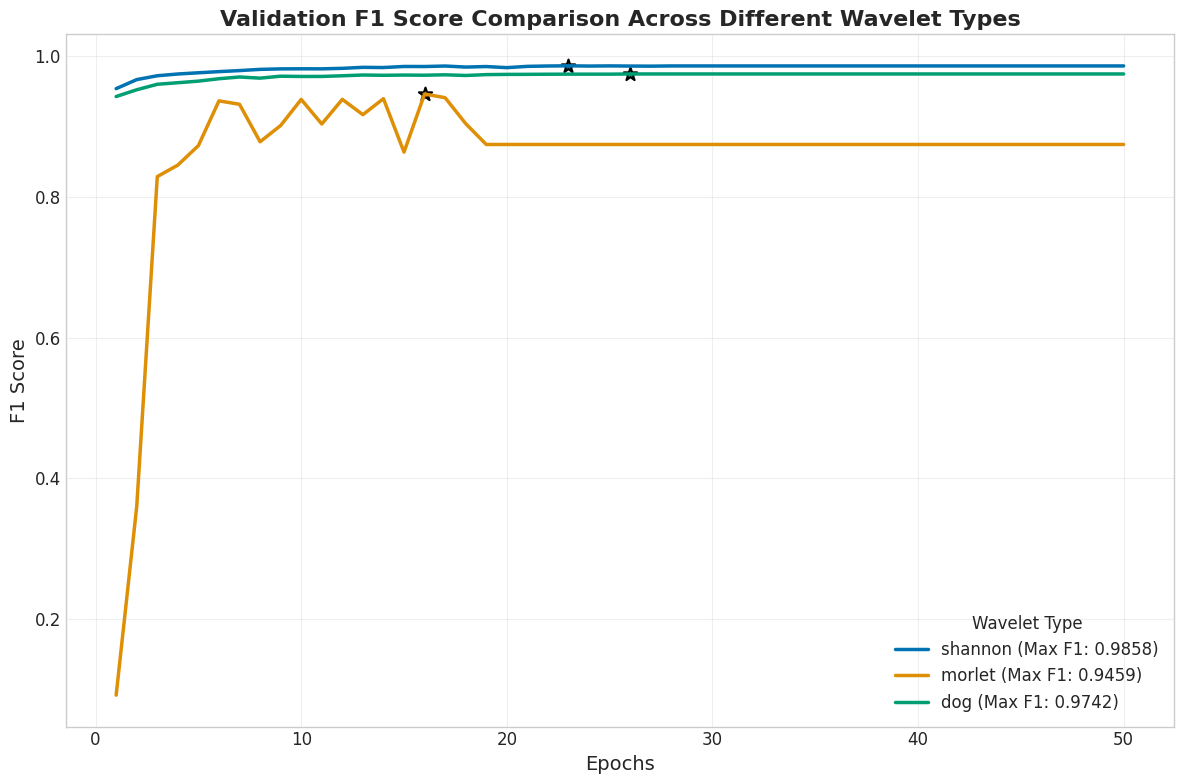

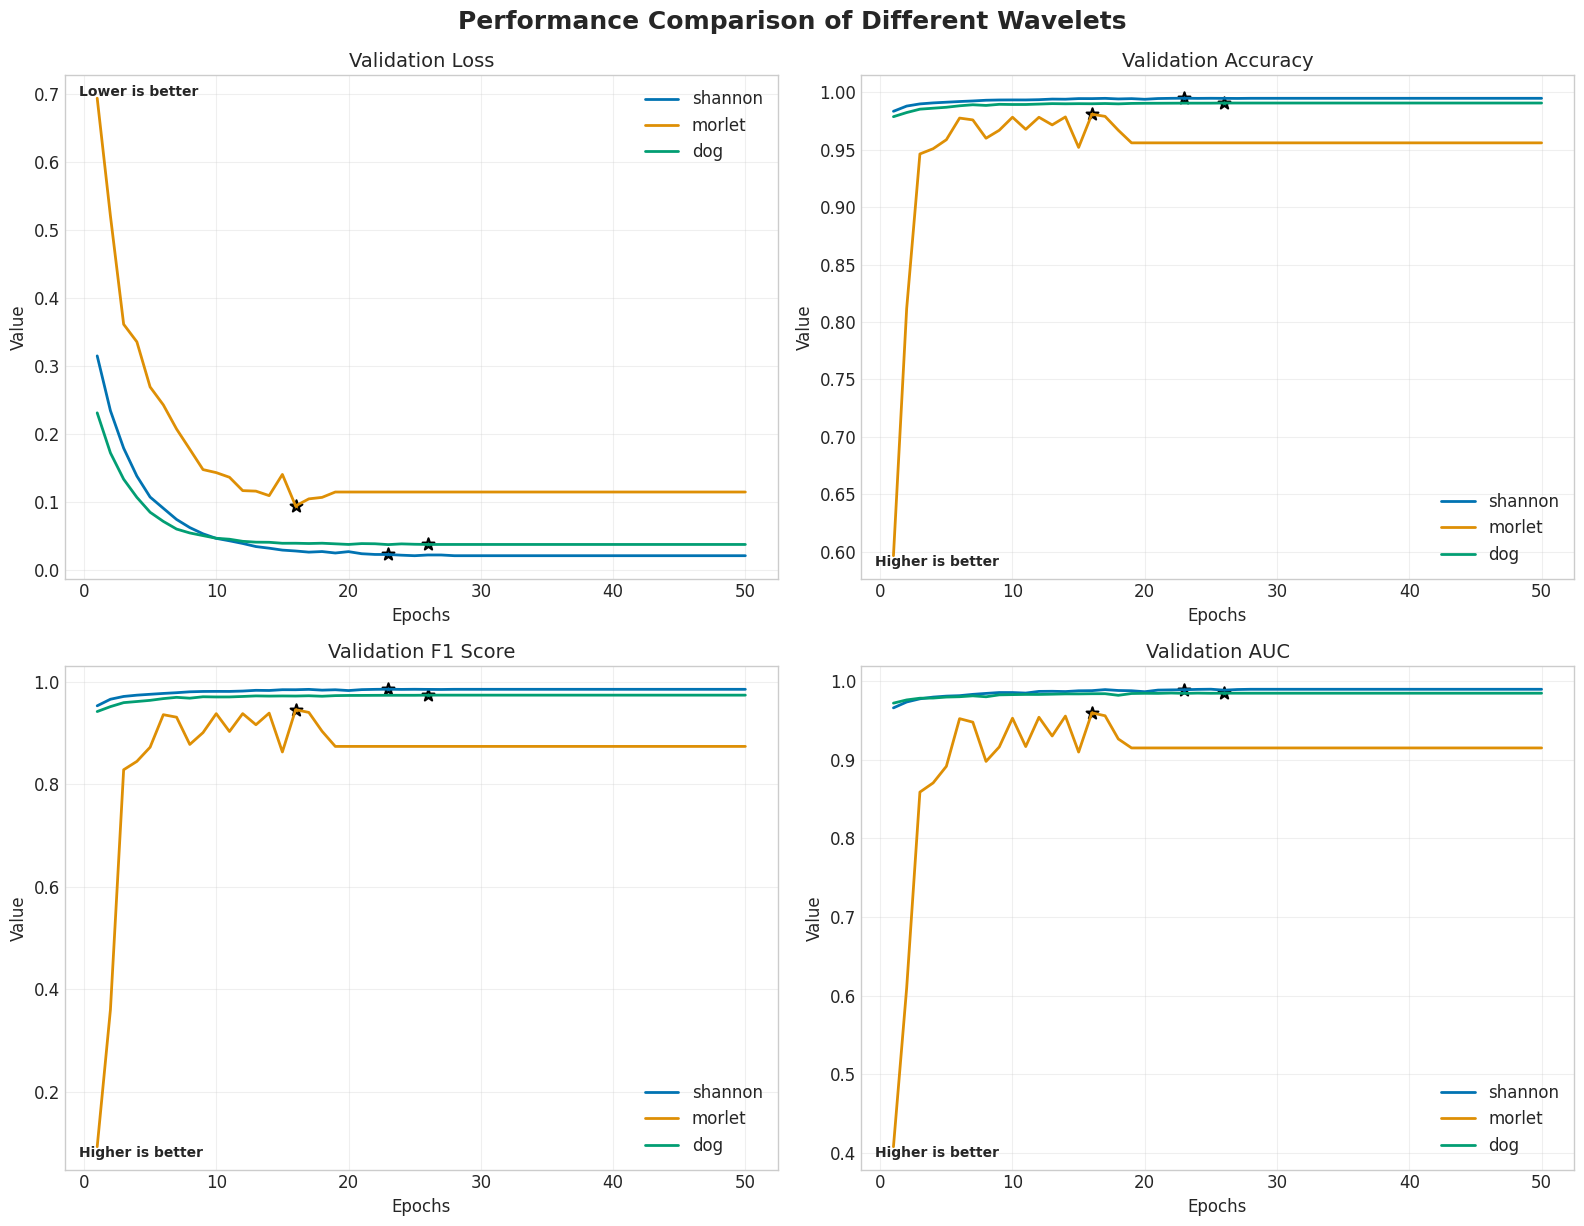


最佳性能汇总表:


,Wavelet,Best Epoch,Val Loss,Val Accuracy,Val Precision,Val Recall,Val F1,Val AUC
0,shannon,23,0.0229,0.9950,0.9928,0.9790,0.9858,0.9887
2,dog,26,0.0377,0.9908,0.9743,0.9742,0.9742,0.9843
1,morlet,16,0.0944,0.9810,0.9669,0.9257,0.9459,0.9594


In [14]:
# 为每种小波寻找验证F1分数最高的epoch
best_epochs = {}
for wavelet in wavelet_types:
    if wavelet in results:
        best_epoch_idx = np.argmax(results[wavelet]['val_f1'])
        best_epochs[wavelet] = {
            'epoch': best_epoch_idx + 1,  # +1 因为索引从0开始
            'f1': results[wavelet]['val_f1'][best_epoch_idx]
        }

# 绘制验证F1分数对比图
plt.figure(figsize=(12, 8))

# 为每种小波类型绘制线条
for wavelet in wavelet_types:
    if wavelet in results:
        epochs = range(1, len(results[wavelet]['val_f1']) + 1)
        plt.plot(epochs, results[wavelet]['val_f1'], 
                 label=f"{wavelet} (Max F1: {best_epochs[wavelet]['f1']:.4f})", 
                 linewidth=2.5)
        
        # 标记最佳点
        best_epoch = best_epochs[wavelet]['epoch']
        best_f1 = best_epochs[wavelet]['f1']
        plt.scatter(best_epoch, best_f1, s=100, marker='*', 
                   edgecolor='black', linewidth=1.5)

# 添加标题和标签
plt.title('Validation F1 Score Comparison Across Different Wavelet Types', fontsize=16, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.legend(title='Wavelet Type', fontsize=12)
plt.grid(True, alpha=0.3)

# 保存图像
plt.tight_layout()
plt.savefig('wavelet_f1_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 绘制包含多个指标的对比图
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 需要绘制的指标及其信息
metrics_info = [
    ('val_loss', 'Validation Loss', axes[0, 0], 'lower'),
    ('val_acc', 'Validation Accuracy', axes[0, 1], 'higher'),
    ('val_f1', 'Validation F1 Score', axes[1, 0], 'higher'),
    ('val_auc', 'Validation AUC', axes[1, 1], 'higher')
]

# 绘制每个指标的折线图
for metric_key, title, ax, goal in metrics_info:
    for wavelet in wavelet_types:
        if wavelet in results:
            epochs = range(1, len(results[wavelet][metric_key]) + 1)
            ax.plot(epochs, results[wavelet][metric_key], 
                    label=f"{wavelet}", linewidth=2)
            
            # 标记最佳F1对应的epoch在该指标上的值
            best_epoch = best_epochs[wavelet]['epoch']
            metric_value = results[wavelet][metric_key][best_epoch-1]
            ax.scatter(best_epoch, metric_value, s=80, marker='*', 
                      edgecolor='black', linewidth=1.5)
    
    # 设置每个子图的标题和标签
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Epochs', fontsize=12)
    ax.set_ylabel('Value', fontsize=12)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 添加提示文本
    if goal == 'lower':
        ax.text(0.02, 0.98, "Lower is better", transform=ax.transAxes, 
                verticalalignment='top', fontsize=10, fontweight='bold')
    else:
        ax.text(0.02, 0.02, "Higher is better", transform=ax.transAxes, 
                verticalalignment='bottom', fontsize=10, fontweight='bold')

# 调整布局并添加总标题
plt.tight_layout()
fig.suptitle("Performance Comparison of Different Wavelets", 
             fontsize=18, fontweight='bold', y=1.02)

# 保存完整的多指标对比图
plt.savefig('wavelet_comparison_all_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

# 创建最佳性能汇总表
comparison_data = []
for wavelet in wavelet_types:
    if wavelet in results:
        best_epoch = best_epochs[wavelet]['epoch']
        idx = best_epoch - 1  # 索引从0开始
        
        comparison_data.append({
            'Wavelet': wavelet,
            'Best Epoch': best_epoch,
            'Val Loss': f"{results[wavelet]['val_loss'][idx]:.4f}",
            'Val Accuracy': f"{results[wavelet]['val_acc'][idx]:.4f}",
            'Val Precision': f"{results[wavelet]['val_precision'][idx]:.4f}",
            'Val Recall': f"{results[wavelet]['val_recall'][idx]:.4f}",
            'Val F1': f"{results[wavelet]['val_f1'][idx]:.4f}",
            'Val AUC': f"{results[wavelet]['val_auc'][idx]:.4f}"
        })

# 创建DataFrame并按F1分数降序排列
import pandas as pd
comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Val F1', ascending=False)

# 显示汇总表格
print("\n最佳性能汇总表:")
comparison_df

In [15]:
# Find the best performing wavelet type
best_wavelet = None
best_f1 = 0
for wavelet, metrics in results.items():
    avg_val_f1 = metrics['val_f1'][-1]  # Final epoch's F1 score
    print(f"{wavelet}: Final validation F1 = {avg_val_f1:.4f}")
    if avg_val_f1 > best_f1:
        best_f1 = avg_val_f1
        best_wavelet = wavelet

print(f"\nBest performing wavelet: {best_wavelet} with F1 score: {best_f1:.4f}")

shannon: Final validation F1 = 0.9856
morlet: Final validation F1 = 0.8741
dog: Final validation F1 = 0.9742

Best performing wavelet: shannon with F1 score: 0.9856


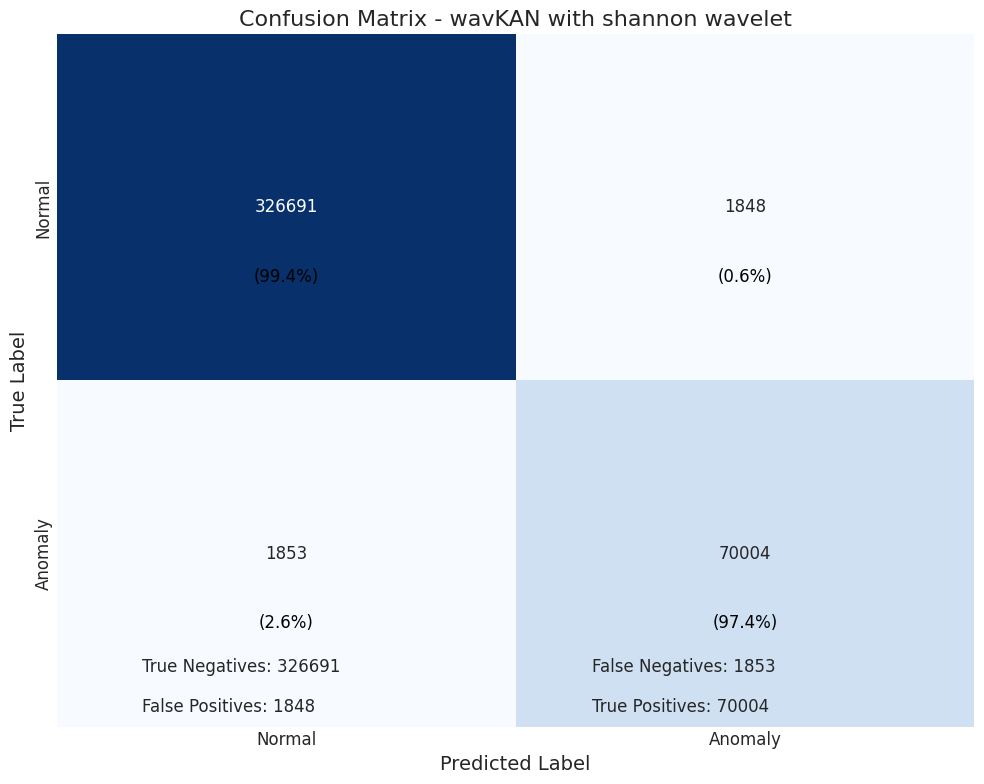


Classification Report:
              precision    recall  f1-score   support

      Normal       0.99      0.99      0.99    328539
     Anomaly       0.97      0.97      0.97     71857

    accuracy                           0.99    400396
   macro avg       0.98      0.98      0.98    400396
weighted avg       0.99      0.99      0.99    400396


Accuracy: 0.9908
Precision: 0.9743
Recall: 0.9742
F1 Score: 0.9742
Sensitivity (TPR): 0.9742
Specificity (TNR): 0.9944


In [16]:

# Load the saved model weights if you saved them
# model.load_state_dict(torch.load(f'wavkan_{best_wavelet}_best_model.pt'))
# Or if you're continuing from the training loop, you can use the model directly

# Set model to evaluation mode
model.eval()

# Generate predictions on test set
all_preds = []
all_targets = []

with torch.no_grad():
    for X_batch, y_batch in testloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch).squeeze()
        
        # Convert outputs to binary predictions
        probs = torch.sigmoid(outputs).cpu().numpy()
        preds = (probs > 0.5).astype(int)
        
        all_preds.extend(preds)
        all_targets.extend(y_batch.cpu().numpy())

# Create confusion matrix
cm = confusion_matrix(all_targets, all_preds)

# Class labels (for binary classification)
class_labels = ['Normal', 'Anomaly']  # Update these labels based on your specific context

# Create figure with larger size for better visibility
plt.figure(figsize=(10, 8))

# Create a heatmap visualization of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and adjust layout
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title(f'Confusion Matrix - wavKAN with {best_wavelet} wavelet', fontsize=16)

# Calculate percentages for a more detailed view
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_percent = cm_norm * 100

# Add text annotations with percentages
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j + 0.5, i + 0.7, f'({cm_percent[i, j]:.1f}%)', 
                 ha='center', va='center', color='black', fontsize=12)

# Add descriptive text for each quadrant
TN, FP, FN, TP = cm.ravel()
plt.figtext(0.15, 0.15, f'True Negatives: {TN}', fontsize=12, ha='left')
plt.figtext(0.15, 0.1, f'False Positives: {FP}', fontsize=12, ha='left')
plt.figtext(0.6, 0.15, f'False Negatives: {FN}', fontsize=12, ha='left')
plt.figtext(0.6, 0.1, f'True Positives: {TP}', fontsize=12, ha='left')

plt.tight_layout()
plt.savefig(f'confusion_matrix_{best_wavelet}.png', dpi=300, bbox_inches='tight')
plt.show()

# Print classification report for additional details
print("\nClassification Report:")
print(classification_report(all_targets, all_preds, target_names=class_labels))

# Calculate and print additional metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(all_targets, all_preds)
precision = precision_score(all_targets, all_preds, zero_division=0)
recall = recall_score(all_targets, all_preds, zero_division=0)
f1 = f1_score(all_targets, all_preds, zero_division=0)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate sensitivity (True Positive Rate) and specificity (True Negative Rate)
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

print(f"Sensitivity (TPR): {sensitivity:.4f}")
print(f"Specificity (TNR): {specificity:.4f}")